# Analysis on Unemployment in the Context of COVID-19  
## Notebook 04: Prediction

### Purpose
- Predict unemployment rate for the upcoming years in order to support policy and economic planning

### Unemployment Rate Prediction (All Countries):

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("../data/cleaned_global_unemployment_data.csv")
# To gain access to the data file

In [3]:
model_df=df[['Year','COVID_Phase','Unemployment_Rate']].dropna()
model_df.head()
# To understand our attributes in our filtered data file for our model

,Year,COVID_Phase,Unemployment_Rate
0,2014,Pre-COVID,8.576
1,2014,Pre-COVID,13.340
2,2014,Pre-COVID,9.206
3,2014,Pre-COVID,6.463
4,2014,Pre-COVID,43.556


In [4]:
phase_mapping = {
    'Pre-COVID':0,
    'COVID':1,
    'Post-COVID':2
}
model_df['COVID_Phase_encoded']=model_df['COVID_Phase'].map(phase_mapping)
# Models don't understand string, hence the purpose of mapping them to integers

In [5]:
from sklearn.model_selection import train_test_split

X = model_df[['Year','COVID_Phase_encoded']]
y = model_df['Unemployment_Rate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
# To assign Features and Predicted Outcome and splitting them for training and testing data in the model

In [6]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
# Training the Linear Regression model

LinearRegression()

In [7]:
from sklearn.metrics import r2_score, mean_absolute_error

y_predict = model.predict(X_test)

print('R2 score:', r2_score(y_test, y_predict))
print('MAE score:', mean_absolute_error(y_test, y_predict))
# Evaluating the performance of the model using the following:
# 1.R2 score(uses variation to evaluate the relationship between the features and the prediction)
# 2.MAE score(uses mean to evaluate how wrong the prediction is from the actual outcome)

R2 score: -0.0031792341518797063
MAE score: 9.056603391127505


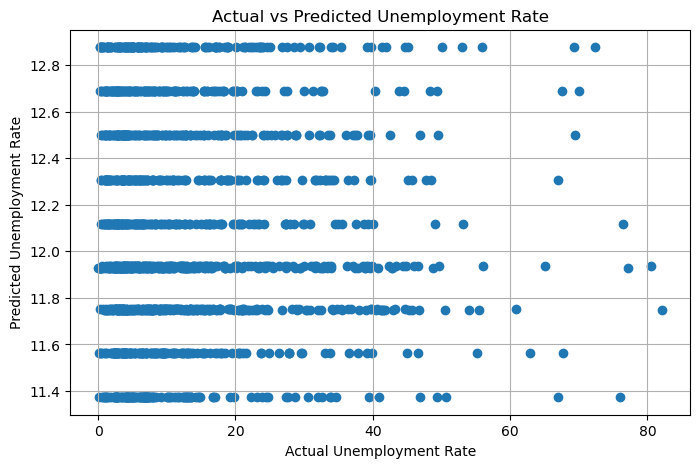

In [8]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_predict)
plt.xlabel("Actual Unemployment Rate")
plt.ylabel("Predicted Unemployment Rate")
plt.title("Actual vs Predicted Unemployment Rate")
plt.grid(True)
plt.show()
# Shows a scatter plot (poor performance of the model, due to lack of correlation between the feature and the prediction)

### Observation Summary

- Prediction accuracy is very poor due to the following facts:
1. The use of weak features such as year and COVID phase(Time doesn't cause unemployment)
2. Lack of more features such as economic indicators(GDP Growth, Inflation Rate, Interest Rates), month data, population, government policy, war, labor laws, etc.
3. Wrong Model usage, since Linear Regression fails to capture the outliers in a straight line(However, no model would provide accurate results without more features)
4. The presence of outliers as large as 80%(But these outliers are correct data and are needed to be presented in the predictions)
5. High heterogeneity by using all countries to predict world unemployment rate(Too many factors to calibrate for each country makes this an impossible to predict)